In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()

# NCATS CYP1AW
Dataset from https://pubchem.ncbi.nlm.nih.gov/bioassay/410

## Assay info

NCGC Assay Overview:


The P450 gene superfamily is involved in metabolism and the clearance of xenobiotics. This assay used human CYP1A2 to measure the demethylation of luciferin 6' methyl ether (Luciferin-ME; Promega-Glo) to luciferin. The luciferin is then measured by luminescence after the addition of a luciferase detection regeant. Luciferin-ME concentration in the assay was equal to its Km for CYP1A2.

NCGC Assay Protocol Summary:

Two uL of enzyme and substrate mix (final concentrations: 20nM CYP1A2, 100uM Luciferin-ME, 100mM KPO4) were dispensed into a white, solid bottom 1536-well microtiter plate. 23nL of compound was transferred by a pin tool. The plate was incubated at room temperature for 10 min. Two uL of an NADPH regeneration solution (Promega supplied reagent) was dispensed and the reaction was allowed to continue for 60 min at room temperature. Then the reaction was stopped by reconstituted detection reagent. After another 20 min of incubation the plate was read on the ViewLux (Perkin Elmer) at 60 sec exposure and 2x2 binning. This protocol was carried out with Promega-Glo reagents and further information can be found at http://www.promega.com/tbs/tb325/tb325.pdf. Data were normalized to the to AC100 inhibition (57 uM furafylline).


In [4]:
df = pd.read_csv("data/AID_410_datatable_all_NCATS_1A2.csv")

In [5]:
list(df.columns)

['PUBCHEM_RESULT_TAG',
 'PUBCHEM_SID',
 'PUBCHEM_CID',
 'PUBCHEM_EXT_DATASOURCE_SMILES',
 'PUBCHEM_ACTIVITY_OUTCOME',
 'PUBCHEM_ACTIVITY_SCORE',
 'PUBCHEM_ACTIVITY_URL',
 'PUBCHEM_ASSAYDATA_COMMENT',
 'Activity Direction',
 'Activity Qualifier',
 'Qualified AC50',
 'Log of AC50',
 'Hill Coefficient',
 'Curve R2',
 'Data Type',
 'Compound Type',
 'Compound QC',
 'Data Analysis QC',
 'NCGC Comment',
 'Curve Fit Model',
 'Hill S0',
 'Hill Sinf',
 'Hill dS',
 'Log AC50 Std Error',
 'Curve Chi2f',
 'Excluded Points',
 'Number of Points',
 'Activity at 0.732nM',
 'Activity at 1.636nM',
 'Activity at 3.658nM',
 'Activity at 8.18nM',
 'Activity at 18.291nM',
 'Activity at 0.041uM',
 'Activity at 0.091uM',
 'Activity at 0.204uM',
 'Activity at 0.457uM',
 'Activity at 1.022uM',
 'Activity at 2.286uM',
 'Activity at 5.111uM',
 'Activity at 11.429uM',
 'Activity at 25.556uM',
 'Activity at 0.057mM']

In [10]:
# first 3 rows are metadata 
df[0:3]

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activity Direction,Activity Qualifier,...,Activity at 0.041uM,Activity at 0.091uM,Activity at 0.204uM,Activity at 0.457uM,Activity at 1.022uM,Activity at 2.286uM,Activity at 5.111uM,Activity at 11.429uM,Activity at 25.556uM,Activity at 0.057mM
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRING,STRING,...,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Indicates direction of activity: inactive, dec...",Indicates if AC50 is = to value or if it is in...,...,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.,% Activity at given concentration.
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT,PERCENT


In [11]:
df = df.drop(labels=list(range(0, 3)), axis=0).reset_index(
    drop=True
)

In [12]:
df.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activity Direction,Activity Qualifier,...,Activity at 0.041uM,Activity at 0.091uM,Activity at 0.204uM,Activity at 0.457uM,Activity at 1.022uM,Activity at 2.286uM,Activity at 5.111uM,Activity at 11.429uM,Activity at 25.556uM,Activity at 0.057mM
0,1,4238703.0,3233812.0,COC1=CC=CC=C1C2=CC3=C(C=C2)N=CN=C3N4CCOCC4,Active,62.0,NaN,NaN,decreasing,=,...,NaN,-9.8,NaN,-45.9,NaN,-107.8,NaN,-123,NaN,-126.7
1,2,4239686.0,3234793.0,CC1=CC=CC=C1C2=CC3=C(C=C2)N=CN=C3N4CCOCC4,Active,59.0,NaN,NaN,decreasing,=,...,NaN,-1.2,NaN,-21.4,NaN,-88.6,NaN,-117.8,NaN,-125.3
2,3,4239896.0,3235003.0,COC1=CC=CC=C1C2=CC(=NC=N2)NC3=CC=NN3,Active,62.0,NaN,NaN,decreasing,=,...,NaN,-20.4,NaN,-50.7,NaN,-100,NaN,-119.5,NaN,-125.1
3,4,4239792.0,3234899.0,C1=CC(=CC=C1NC2=NC=NC3=C2C=C(C=C3)C4=COC=C4)F,Active,60.0,NaN,NaN,decreasing,=,...,NaN,-13.3,NaN,-33.9,NaN,-100.5,NaN,-120.9,NaN,-125
4,5,4238356.0,3233467.0,CC1=CC(=CC=C1)CNC2=NC(=NC=C2)C3=CN=CC=C3,Active,69.0,NaN,NaN,decreasing,=,...,NaN,-45.9,NaN,-101.3,NaN,-118.5,NaN,-121.9,NaN,-124.1


<Axes: xlabel='PUBCHEM_ACTIVITY_SCORE', ylabel='Count'>

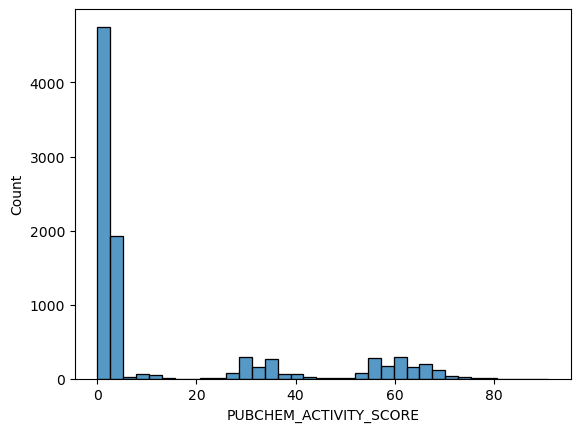

In [13]:
# lets look at activity
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_SCORE")

<Axes: xlabel='PUBCHEM_ACTIVITY_OUTCOME', ylabel='Count'>

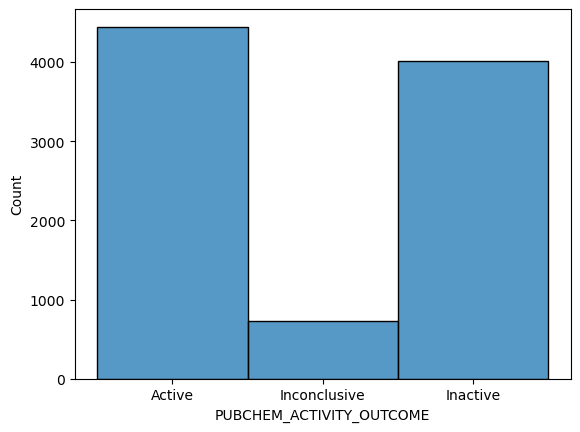

In [14]:
sns.histplot(data=df, x="PUBCHEM_ACTIVITY_OUTCOME")

In [15]:
# clean up the main_dataset
activity_cols = ["PUBCHEM_ACTIVITY_OUTCOME", "PUBCHEM_ACTIVITY_SCORE"]
mol_col = "PUBCHEM_EXT_DATASOURCE_SMILES"
mol_id_cols = ["PUBCHEM_SID", "PUBCHEM_CID"]
len(df)

9198

In [16]:
df = df.dropna(subset="PUBCHEM_CID")

In [17]:
len(df)

9174

In [19]:
df["PUBCHEM_SID"] = df["PUBCHEM_SID"].astype(int)
df["PUBCHEM_CID"] = df["PUBCHEM_CID"].astype(int)
df["PUBCHEM_CID"].to_csv("data/NCATS_CYP_raw_cids.csv", index=False, header=False)

In [ ]:
pubchem_mapping_file = "./NCATS_CYP_raw/2870917276013973259.txt"